In [2]:
pip install torch

     |████████████████████████████████| 881.9 MB 7.6 kB/s             ��████████████████▉      | 711.3 MB 81.8 MB/s eta 0:00:03
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

     |████████████████████████████████| 458.3 MB 13 kB/s                   | 176.2 MB 92.4 MB/s eta 0:00:04
     |████████████████████████████████| 65 kB 4.4 MB/s             
     |████████████████████████████████| 4.5 MB 65.4 MB/s            
     |████████████████████████████████| 5.6 MB 34.5 MB/s            
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 1.3 MB 70.4 MB/s            
     |████████████████████████████████| 132 kB 64.9 MB/s            
     |████████████████████████████████| 42 kB 103 kB/s             
     |████████████████████████████████| 462 kB 76.7 MB/s            
     |████████████████████████████████| 4.9 MB 68.6 MB/s            
     |████████████████████████████████| 781 kB 71.5 MB/s            
     |████████████████████████████████| 152 kB 63.7 MB/s            
     |████████████████████████████████| 97 kB 666 kB/s             
     |████████████████████████████████| 155 kB 74.4 MB

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylint 2.12.2 requires typing-extensions>=3.10.0; python_version < "3.10", but you have typing-extensions 3.7.4.3 which is incompatible.
astroid 2.9.0 requires typing-extensions>=3.10; python_version < "3.10", but you have typing-extensions 3.7.4.3 which is incompatible.
aiobotocore 1.3.0 requires botocore<1.20.50,>=1.20.49, but you have botocore 1.26.10 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import torch
import torch.nn as nn

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.config.run_functions_eagerly(True)
from sklearn.utils import class_weight
from sklearn.metrics import mean_squared_error
import IPython
import IPython.display

import datetime

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


from math import sqrt

import seaborn as sns

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df = pd.read_csv('../Data/Full_train_test_split/df_full_end_test.csv')
df = df.drop(columns = ["Unnamed: 0", "1_hr_std","2_hr_std","3_hr_std", "4_hr_std","5_hr_std","6_hr_std","7_hr_std", "8_hr_std",
                        "9_hr_std","10_hr_std","11_hr_std", "12_hr_std","13_hr_std","14_hr_std","15_hr_std", "16_hr_std",
                        "17_hr_std","18_hr_std","19_hr_std", "20_hr_std","21_hr_std","22_hr_std","23_hr_std", "24_hr_std",
                        "25_hr_std","26_hr_std","27_hr_std", "28_hr_std","standardised_texts","4_hr","3_hr",
                        "2_hr","1_hr","5_hr","6_hr","7_hr","8_hr","9_hr","10_hr","11_hr","12_hr","13_hr","14_hr","15_hr",
                        "16_hr","17_hr","18_hr","19_hr","20_hr","21_hr","22_hr","23_hr","24_hr","25_hr","26_hr","27_hr","28_hr"])

In [14]:
df['chunk'] = pd.to_datetime(df['chunk'], format="%Y-%m-%d %H:%M:%S")
df['hour'] = df['chunk'].dt.hour
df['weekday'] = df['chunk'].dt.dayofweek
df['rainfall_weighted'] = np.log(df['rainfall_weighted'] + 0.1)
#df['weekday'] = df['weekday'].astype("category")
df = df.set_index('chunk')
abnormals = df["abnormal"].astype('int')
df = df.drop(columns =["abnormal"])
df.head()

,texts,temp_weighted,cloud_cover_weighted,rainfall_weighted,polarity,daily_policy_index,train_test,hour,weekday
chunk,,,,,,,,,
2018-10-26 19:00:00,17,6.034263,21.525829,-2.302585,0.043212,131.03,train,19,4
2018-10-26 20:00:00,15,5.561813,16.283735,-2.302585,0.043212,131.03,train,20,4
2018-10-26 21:00:00,15,5.399833,17.538188,-2.302585,0.043212,131.03,train,21,4
2018-10-26 22:00:00,19,4.787232,10.768733,-2.302585,0.043212,131.03,train,22,4
2018-10-26 23:00:00,21,4.534415,11.672903,-2.302585,0.043212,131.03,train,23,4


In [15]:
abnormals = abnormals.to_frame()

In [64]:
abnormals_test = abnormals['2022-04-02 03:00:00':'2022-06-06 20:00:00']

In [29]:
train = df.loc[df['train_test'] == "train"]
train = train.drop(columns = ["train_test"])
train = train.astype('float')
test = df.loc[df['train_test'] == "test"]
train = train.astype('float')
test = test.drop(columns = ["train_test"])
val = train.tail(3916)
train = train.head(26137)

In [30]:
train_mean = train.mean()
train_std = train.std()

train_df = (train - train_mean) / train_std
val_df = (val - train_mean) / train_std
test_df = (test - train_mean) / train_std

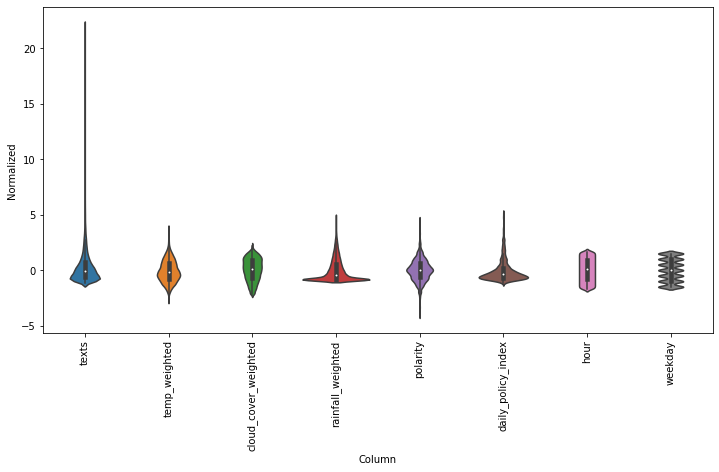

In [31]:
df_std = df.drop(columns =["train_test"])
df_std = (df_std - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(train.keys(), rotation=90)


In [32]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])


In [33]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=4,
                     label_columns=['texts'])
w1

Total window size: 28
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [27]
Label column name(s): ['texts']

In [34]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [35]:
# Takes 3 windows, each 48 long (i.e. 48 hrs) and 8 wide (i.e. 8 columns at each timepoint)
# Creates input window of 24 long and 8 wide
# Creates a label output of 1 long and 1 wide

# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w1.total_window_size]),
                           np.array(train_df[100:100+w1.total_window_size]),
                           np.array(train_df[200:200+w1.total_window_size])])


example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 28, 8)
Inputs shape: (3, 24, 8)
labels shape: (3, 1, 1)


In [36]:
def plot(self, model=None, plot_col='texts', max_subplots=8):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [37]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [38]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [39]:
multi_val_performance = {}
multi_performance = {}

MAX_EPOCHS = 30

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [40]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1),
    tf.keras.layers.Reshape([1, 1])
])


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


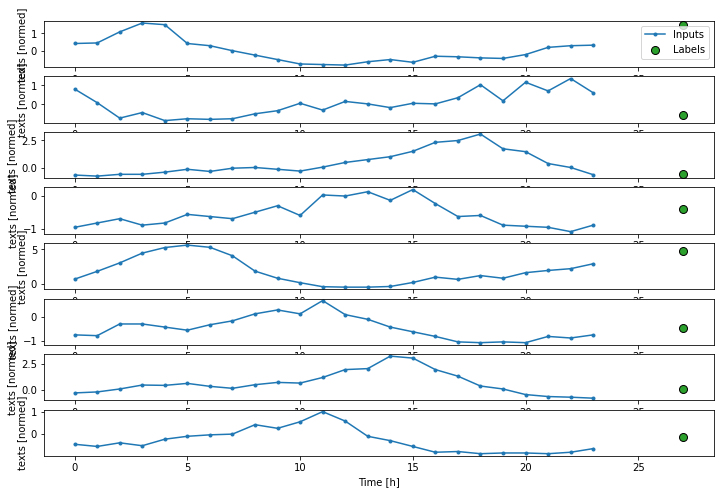

In [41]:
w1.plot()

122/122 [==============================] - 4s 34ms/step - loss: 1.0114 - mean_absolute_error: 0.5239


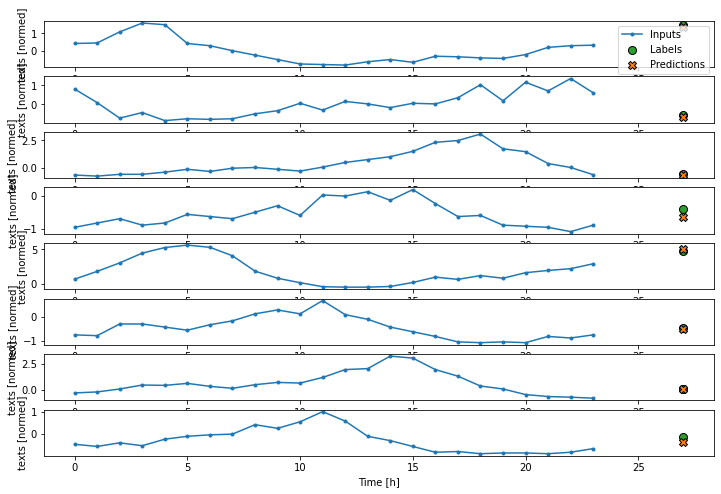

In [44]:
#history = compile_and_fit(lstm_model, w1)

#IPython.display.clear_output()

multi_val_performance['LSTM'] = lstm_model.evaluate(w1.val)
multi_performance['LSTM'] = lstm_model.evaluate(w1.test, verbose=0)
w1.plot(lstm_model)

In [43]:
from keras.models import load_model
#lstm_model.save('LSTM_RNN.h5')
lstm_model = load_model('LSTM_RNN.h5')

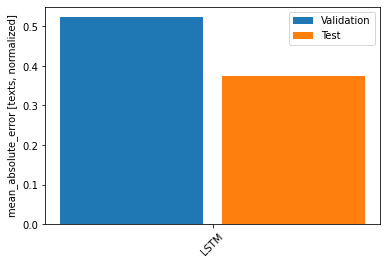

In [45]:
x = np.arange(len(multi_performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.ylabel('mean_absolute_error [texts, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
_ = plt.legend()


In [107]:
test_df

,texts,temp_weighted,cloud_cover_weighted,rainfall_weighted,polarity,daily_policy_index,hour,weekday
chunk,,,,,,,,
2022-04-01 00:00:00,2.094754,-1.668592,-1.207406,-0.841625,-0.184348,-0.730748,-1.661329,0.499205
2022-04-01 01:00:00,0.703651,-1.709756,-0.333995,-0.285873,-0.184348,-0.730748,-1.516869,0.499205
2022-04-01 02:00:00,0.606597,-1.750317,-1.021822,-0.841625,-0.184348,-0.730748,-1.372409,0.499205
2022-04-01 03:00:00,-0.169833,-1.797109,-0.869644,-0.841625,-0.184348,-0.730748,-1.227950,0.499205
2022-04-01 04:00:00,-0.622750,-1.848866,-0.459953,-0.841625,-0.184348,-0.730748,-1.083490,0.499205
...,...,...,...,...,...,...,...,...
2022-06-06 16:00:00,1.738890,0.878303,0.923378,0.253432,2.620998,-0.306448,0.650028,-1.498608
2022-06-06 17:00:00,2.224159,0.855627,0.795067,-0.250285,2.620998,-0.306448,0.794487,-1.498608
2022-06-06 18:00:00,2.871183,0.836034,0.781472,-0.706656,2.620998,-0.306448,0.938947,-1.498608


In [53]:
truthpred = pd.DataFrame(columns = ['truth', 'preds','hour','weekday'])
test_data = test_df.tail(len(test_df) - 27) * train_std + train_mean

for i in range(len(test_df) - 27):
    test_window = tf.stack([np.array(test_df[(i):(i)+w1.total_window_size])])

    test_inputs, test_labels = w1.split_window(test_window)
    
    truth = (test_labels[0,:,0] * train_std[0] + train_mean[0])
    preds = (lstm_model.predict(test_inputs)[0,:,0] * train_std[0] + train_mean[0])
    hour  = test_data['hour'][i]
    weekday = test_data['weekday'][i]
    truthpred.loc[len(truthpred)] = [truth, preds, hour, weekday]


truthpred




/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


,truth,preds,hour,weekday
0,"(tf.Tensor(19.0, shape=(), dtype=float64))",[36.354794],3.0,5.0
1,"(tf.Tensor(27.0, shape=(), dtype=float64))",[24.269775],4.0,5.0
2,"(tf.Tensor(17.0, shape=(), dtype=float64))",[19.716171],5.0,5.0
3,"(tf.Tensor(21.0, shape=(), dtype=float64))",[19.176765],6.0,5.0
4,"(tf.Tensor(16.0, shape=(), dtype=float64))",[21.162748],7.0,5.0
...,...,...,...,...
1573,"(tf.Tensor(89.0, shape=(), dtype=float64))",[90.36026],16.0,0.0
1574,"(tf.Tensor(104.0, shape=(), dtype=float64))",[95.332245],17.0,0.0
1575,"(tf.Tensor(124.0, shape=(), dtype=float64))",[101.72594],18.0,0.0
1576,"(tf.Tensor(140.0, shape=(), dtype=float64))",[111.52269],19.0,0.0


In [54]:
truthpred.to_csv('../Data/RNN_preds.csv')

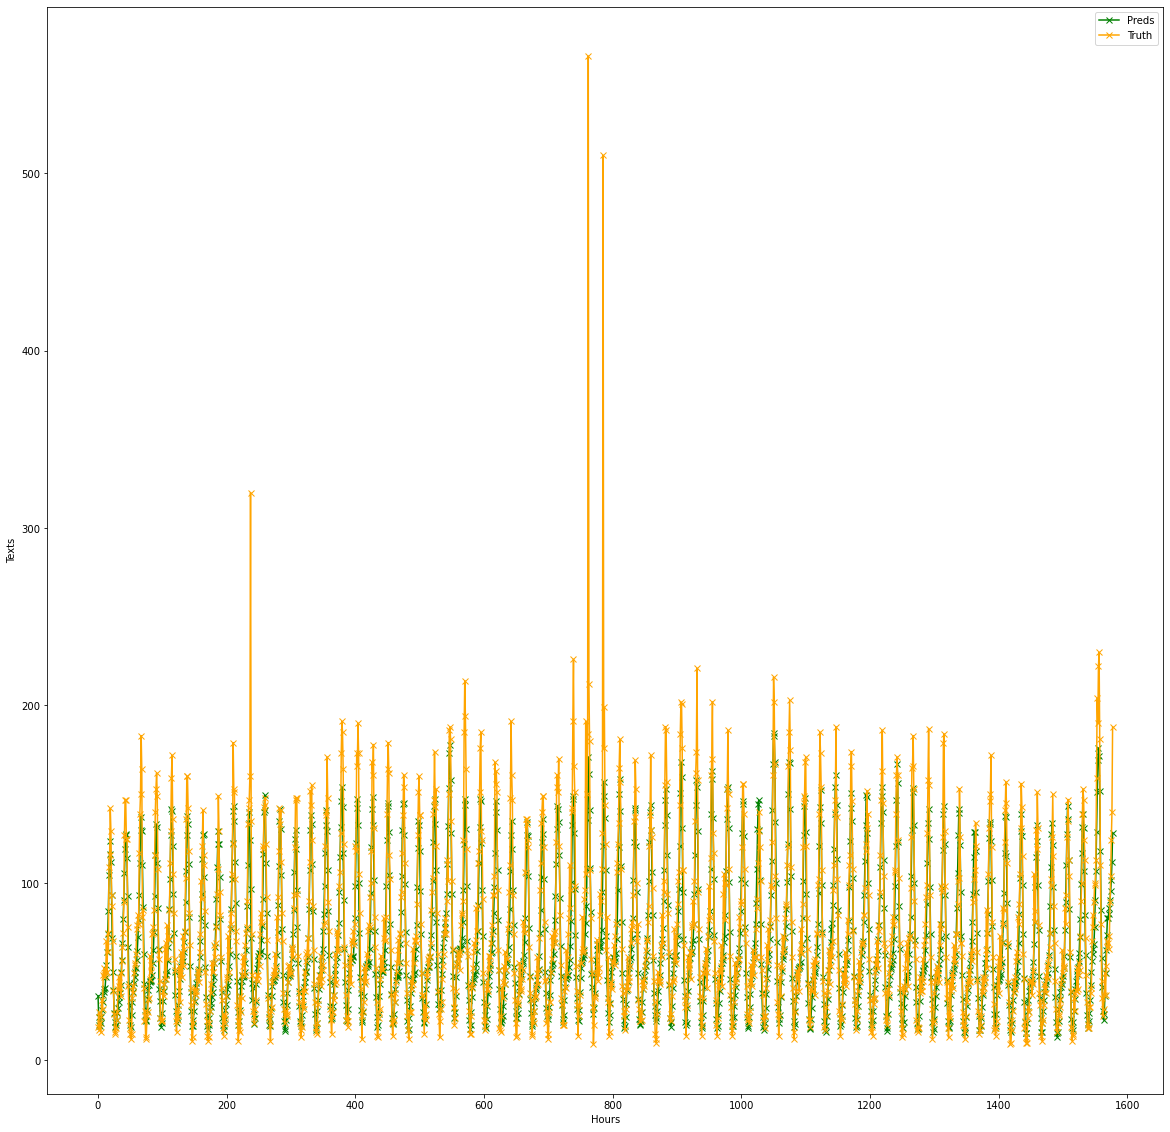

In [55]:
plt.rcParams['figure.figsize'] = [20, 20]

plt.plot(truthpred['preds'],'bx-',color='g',label='Preds')
plt.plot(truthpred['truth'],'bx-',color='orange',label='Truth')
plt.xlabel("Hours")
plt.ylabel("Texts")
plt.legend()

In [56]:
preds = pd.read_csv('../Data/RNN_preds.csv')
preds = preds.drop(columns = ["Unnamed: 0"])

In [57]:
chars_to_replace = "[]"
def replace(text):
    for char in chars_to_replace:
        if char in text:
            text = text.replace(char, "")

    return text

for i in range(len(preds)):
    preds['preds'][i] = replace(preds['preds'][i])


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [58]:
preds['preds'] = preds['preds'].astype(float)

In [59]:
preds.head()

,truth,preds,hour,weekday
0,"tf.Tensor([19.], shape=(1,), dtype=float64)",36.354794,3.0,5.0
1,"tf.Tensor([27.], shape=(1,), dtype=float64)",24.269775,4.0,5.0
2,"tf.Tensor([17.], shape=(1,), dtype=float64)",19.716171,5.0,5.0
3,"tf.Tensor([21.], shape=(1,), dtype=float64)",19.176765,6.0,5.0
4,"tf.Tensor([16.], shape=(1,), dtype=float64)",21.162748,7.0,5.0


In [60]:
len(preds)

1578

In [65]:
cutoffs = pd.read_csv('../Data/abnormal_cutoffs.csv')
cutoffs = cutoffs.drop(columns = ["Unnamed: 0"])
cutoffs['chunk'] = pd.to_datetime(cutoffs['chunk'], format="%Y-%m-%d %H:%M:%S")
cutoffs = cutoffs.set_index('chunk')
cutoffs = cutoffs.sort_index()
cutoffs = cutoffs['2022-04-02 03:00:00':'2022-06-06 20:00:00']

In [66]:
cutoffs.head()

,cutoff
chunk,
2022-04-02 03:00:00,54.543138
2022-04-02 04:00:00,42.504436
2022-04-02 05:00:00,29.729129
2022-04-02 06:00:00,28.668206
2022-04-02 07:00:00,37.159124


In [67]:
len(abnormals_test)

1578

In [68]:
cutoffs_q1 = pd.read_csv('../Data/Q1_22_cutoffs.csv')
cutoffs_q1 = cutoffs_q1.drop(columns = ["Unnamed: 0"])

import time
cutoffs_q1['weekday'] = cutoffs_q1['weekday'].apply(lambda x: time.strptime(x, "%A").tm_wday )
cutoffs_q1

,cutoff,hour,weekday
0,209.914044,0,0
1,151.397346,1,0
2,117.241171,2,0
3,72.254300,3,0
4,47.695236,4,0
...,...,...,...
163,226.092302,19,6
164,269.782590,20,6
165,319.543256,21,6
166,331.110694,22,6


In [69]:
preds = pd.merge(preds, cutoffs_q1, how='left', on=['hour','weekday'])
preds

,truth,preds,hour,weekday,cutoff
0,"tf.Tensor([19.], shape=(1,), dtype=float64)",36.354794,3.0,5.0,79.540318
1,"tf.Tensor([27.], shape=(1,), dtype=float64)",24.269775,4.0,5.0,69.636618
2,"tf.Tensor([17.], shape=(1,), dtype=float64)",19.716171,5.0,5.0,40.724261
3,"tf.Tensor([21.], shape=(1,), dtype=float64)",19.176765,6.0,5.0,35.384915
4,"tf.Tensor([16.], shape=(1,), dtype=float64)",21.162748,7.0,5.0,44.292302
...,...,...,...,...,...
1573,"tf.Tensor([89.], shape=(1,), dtype=float64)",90.360260,16.0,0.0,160.414859
1574,"tf.Tensor([104.], shape=(1,), dtype=float64)",95.332245,17.0,0.0,183.212083
1575,"tf.Tensor([124.], shape=(1,), dtype=float64)",101.725940,18.0,0.0,211.585350
1576,"tf.Tensor([140.], shape=(1,), dtype=float64)",111.522690,19.0,0.0,264.007818


In [70]:
abnormals_test = abnormals_test.set_index(preds.index)
cutoffs = cutoffs.set_index(preds.index)
preds['abnormal_cutoff_truth'] = cutoffs
preds['abnormal_truth'] = abnormals_test['abnormal']

In [71]:
preds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1578 entries, 0 to 1577
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   truth                  1578 non-null   object 
 1   preds                  1578 non-null   float64
 2   hour                   1578 non-null   float64
 3   weekday                1578 non-null   float64
 4   cutoff                 1578 non-null   float64
 5   abnormal_cutoff_truth  1578 non-null   float64
 6   abnormal_truth         1578 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 98.6+ KB


In [72]:
preds['abnormal_preds'] = np.where(preds['preds'] >= preds['cutoff'], 1, 0)
preds['abnormal_preds_truth'] = np.where(preds['preds'] >= preds['abnormal_cutoff_truth'], 1, 0)
preds.head()

,truth,preds,hour,weekday,cutoff,abnormal_cutoff_truth,abnormal_truth,abnormal_preds,abnormal_preds_truth
0,"tf.Tensor([19.], shape=(1,), dtype=float64)",36.354794,3.0,5.0,79.540318,54.543138,0,0,0
1,"tf.Tensor([27.], shape=(1,), dtype=float64)",24.269775,4.0,5.0,69.636618,42.504436,0,0,0
2,"tf.Tensor([17.], shape=(1,), dtype=float64)",19.716171,5.0,5.0,40.724261,29.729129,0,0,0
3,"tf.Tensor([21.], shape=(1,), dtype=float64)",19.176765,6.0,5.0,35.384915,28.668206,0,0,0
4,"tf.Tensor([16.], shape=(1,), dtype=float64)",21.162748,7.0,5.0,44.292302,37.159124,0,0,0


In [73]:
sum(preds['abnormal_preds'])

0

In [74]:
sum(preds['abnormal_preds_truth'])

9

In [75]:
sum(preds['abnormal_truth'])

3

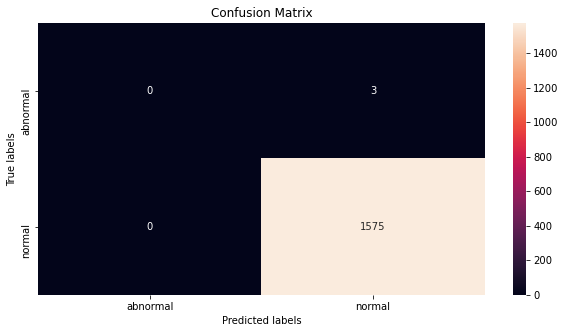

In [76]:
## Accuracy
plt.rcParams['figure.figsize'] = [10, 5]
labels = [1, 0]
cm = confusion_matrix(preds['abnormal_truth'], preds['abnormal_preds'], labels=labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')

# labels, title and ticks#
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['abnormal', 'normal']) 
ax.yaxis.set_ticklabels(['abnormal', 'normal'])

plt.show()


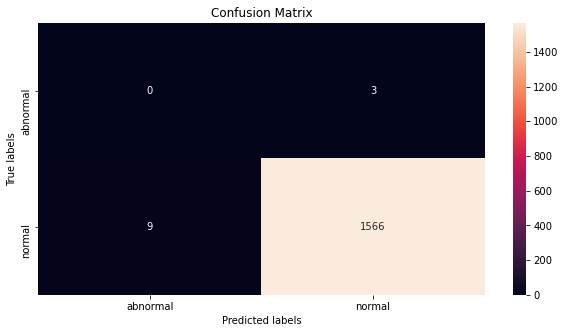

In [77]:
## Accuracy

labels = [1, 0]
cm = confusion_matrix(preds['abnormal_truth'], preds['abnormal_preds_truth'], labels=labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')

# labels, title and ticks#
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['abnormal', 'normal']) 
ax.yaxis.set_ticklabels(['abnormal', 'normal'])

plt.show()


In [78]:
preds

,truth,preds,hour,weekday,cutoff,abnormal_cutoff_truth,abnormal_truth,abnormal_preds,abnormal_preds_truth
0,"tf.Tensor([19.], shape=(1,), dtype=float64)",36.354794,3.0,5.0,79.540318,54.543138,0,0,0
1,"tf.Tensor([27.], shape=(1,), dtype=float64)",24.269775,4.0,5.0,69.636618,42.504436,0,0,0
2,"tf.Tensor([17.], shape=(1,), dtype=float64)",19.716171,5.0,5.0,40.724261,29.729129,0,0,0
3,"tf.Tensor([21.], shape=(1,), dtype=float64)",19.176765,6.0,5.0,35.384915,28.668206,0,0,0
4,"tf.Tensor([16.], shape=(1,), dtype=float64)",21.162748,7.0,5.0,44.292302,37.159124,0,0,0
...,...,...,...,...,...,...,...,...,...
1573,"tf.Tensor([89.], shape=(1,), dtype=float64)",90.360260,16.0,0.0,160.414859,114.507569,0,0,0
1574,"tf.Tensor([104.], shape=(1,), dtype=float64)",95.332245,17.0,0.0,183.212083,120.612406,0,0,0
1575,"tf.Tensor([124.], shape=(1,), dtype=float64)",101.725940,18.0,0.0,211.585350,137.513080,0,0,0
1576,"tf.Tensor([140.], shape=(1,), dtype=float64)",111.522690,19.0,0.0,264.007818,174.398872,0,0,0


In [166]:
#preds['shifted'] =preds['abnormal_preds'].shift(1)
#preds['shifted'][0] = 0

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


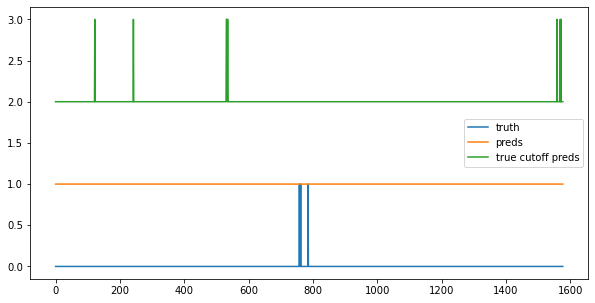

In [79]:
plt.plot(preds['abnormal_truth'], label = "truth")
plt.plot(preds['abnormal_preds']+1, label = "preds")
plt.plot(preds['abnormal_preds_truth']+2, label = "true cutoff preds")

plt.legend()

In [183]:
def get_results(truth, prediction, df, idx):
    

    acc = accuracy_score(truth, prediction)
    f1 = f1_score(truth, prediction)
    precision = precision_score(truth, prediction)
    recall = recall_score(truth, prediction)

    df.loc[idx,:] = [acc, f1, precision, recall]

    return df


In [184]:
results = pd.DataFrame(index = ['LSTM RNN'], 
                       columns = ['accuracy', 'f1', 'precision', 'recall'])
results = get_results(preds['abnormal_truth'], preds['abnormal_preds'], results, 'LSTM RNN')
results

,accuracy,f1,precision,recall
LSTM RNN,0.994927,0,0,0


In [80]:
preds['truth_float'] = preds['truth'].str[11:]
preds['truth_float'] = preds['truth_float'].str[:3]

chars_to_replace = ".]"
def replace_truth(text):
    for char in chars_to_replace:
        if char in text:
            text = text.replace(char, "")

    return text

for i in range(len(preds)):
    preds['truth_float'][i] = replace(preds['truth_float'][i])


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [186]:
def get_metrics(truth, pred, df, idx):
    
    mae = mean_absolute_error(truth,pred)
    rmse = sqrt(mean_squared_error(truth,pred))
    forecast_errors = [truth[i]-pred[i] for i in range(len(truth))]
    me = sum(forecast_errors) * 1.0/len(truth)
    sdae = np.std(abs(pred-truth))
    
    df.loc[idx,:] = [mae, rmse, me, sdae]
    return df
    

In [81]:
preds['truth_float'] = pd.to_numeric(preds['truth_float'])

In [189]:
error_metrics = pd.DataFrame(index = ['LSTM RNN'], 
                       columns = ['MAE', 'RMSE', 'ME', 'SDAE'])
error_metrics = get_metrics(preds['truth_float'], preds['preds'], error_metrics, 'LSTM RNN')

error_metrics

,MAE,RMSE,ME,SDAE
LSTM RNN,11.5532,21.5181,6.01134,18.1536


In [82]:
preds.to_csv('../Data/RNN_preds_full.csv')